655360
0 3506
1 3521
2 3475
3 3491
4 3493
[-0.7762557077625571, -0.09132420091324202, -2.1917808219178085, -1.4611872146118723, -1.3698630136986303]
P VALUE:
KstestResult(statistic=0.5812009902192026, pvalue=0.039162547988328675)


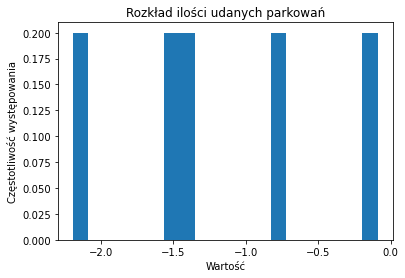

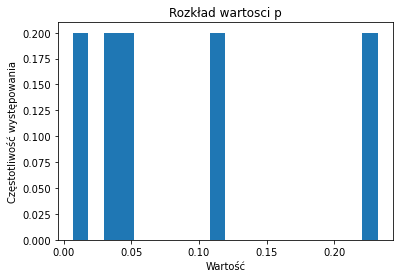

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import random

################MATH VAL#################
mu = 3523
sigma = 21.9
#########################################

#################MY VAL##################
nr_trials = 12000
nr_helicopter = 0
nr_values = 1200000
wide = 100.0
high = 100.0
k = 1
x = 0
y = 0
#counter = 0
#
wide_len = []
high_len = []
succ = list()
p_vals=[]

#########################################



data_2 = open("file.bin", "rb")
data = np.fromfile(data_2, dtype=np.uint32)
data = data.tolist()
print(len(data))
counter = 0       
for i in range(0, 120000):#len(data)):
    if counter % 2:
        #high_len.append(float(data[i])*100.0/256.0)
        high_len.append(random.random() * 100.0)
    else:
        #wide_len.append(float(data[i])*100.0/256.0)
        wide_len.append(random.random() * 100.0)
    counter = counter+1


for nr_test in range(0, 5):
    nr_succ = 0
    wide_heli_parkd = []
    high_heli_parkd = []
    for i in range(nr_helicopter, nr_helicopter + nr_trials):
        crash = False
        x = wide_len[i]
        y = high_len[i]

        for j in range(0, len(wide_heli_parkd)):
            if abs(x - wide_heli_parkd[j]) <= 1.0 and abs(y - high_heli_parkd[j]) <= 1.0:
                crash = True
                break

        if not crash:
            wide_heli_parkd.append(x)
            high_heli_parkd.append(y)
            nr_succ += 1

    nr_helicopter += nr_trials
    suc = ((nr_succ - mu) / sigma)
    succ.append(suc)
    p_val = stats.norm.sf(abs(suc)) /2
    p_vals.append(p_val)
    print(nr_test, nr_succ)
print(succ)
print("P VALUE:")
print(stats.kstest(succ, 'norm'))

#1
plt.hist(succ, bins = 20, stacked = True, weights = np.zeros_like(succ)+1./len(succ))
plt.title("Rozkład ilości udanych parkowań")
plt.xlabel("Wartość")
plt.ylabel("Częstotliwość występowania")
plt.grid(which = 'minor')
plt.show()

#2
plt.hist(p_vals, bins = 20, stacked = True, weights = np.zeros_like(p_vals)+1./len(p_vals))
plt.title("Rozkład wartosci p")
plt.xlabel("Wartość")
plt.ylabel("Częstotliwość występowania")
plt.grid(which = 'minor')
plt.show()